---
title: "Lab 1 - PECARN TBI Data Analysis, STAT 214, Sp25"
date: "February 22, 2025"
format: 
  pdf:
    fontsize: 11pt
    include-in-header: 
      text: |
        \usepackage[a4paper, margin=1in]{geometry}  % 전체 여백 설정 (1인치)
        \usepackage{setspace}  
        \renewcommand{\baselinestretch}{1.0}  
        \setlength{\parskip}{2pt plus 1pt minus 1pt}  
        \raggedbottom  
execute: 
  echo: true
---

## 1. Introduction

Traumatic brain injury (TBI) is a significant concern in pediatric emergency medicine. In this lab, we analyze the PECARN TBI dataset to evaluate clinical decision rules for recommending CT scans. Our goal is to perform comprehensive data cleaning, exploratory data analysis (EDA), and predictive modeling while incorporating domain knowledge from Kuppermann et al. (2009).

## 2. Data

The dataset is derived from the PECARN study and consists of patient-level clinical data collected from multiple emergency departments. It includes variables such as Glasgow Coma Scale (GCS) scores, injury mechanism, clinical signs (e.g., scalp hematoma, altered mental status), and CT scan outcomes. Detailed information on each feature is well presented in the documentation (e.g., TBI PUD Documentation 10-08-2013.xlsx). However, the raw data requires some cleaning before use. The details of the data cleaning process are presented in the next chapter.

## 3. Data Collection and Cleaning

Data were collected as part of the PECARN study and are provided in CSV and Excel formats. In this section, we describe the cleaning process:


- **Removing Irrelevant Data:** Entries that are not relevant to the analysis should be identified and removed.
- **Non-Standard Data Detection:** A sanity check should be performed to identify any values that are not logically possible in the dataset.
- **Handling Missing Values:** Entries that are represented as NaN or blank spaces need to be addressed.
- **Context-Based Data Validation:** Values that are inconsistent when considered in relation to other variables should be identified and removed.
- **Standardization:** Reformat variables to ensure consistency.

A Python function `clean_data()` is defined in a separate script (`clean.py`) to perform these steps reproducibly. We elaborated on the logical structure underlying these processes in the following sections.

In [22]:
#| echo: false
#| output: false

import importlib
import clean
importlib.reload(clean)
from clean import clean_data

In [23]:
#| echo: false
#| output: false

# Import the cleaning function from clean.py
from clean import clean_data
import pandas as pd

file_path = "../data/TBI PUD 10-08-2013.csv"

# Load the raw data and check its size
raw_data = pd.read_csv(file_path)
print(f"Raw Data Size: {raw_data.shape}")

# Apply the data cleaning function
cleaned_data = clean_data(raw_data)

Raw Data Size: (43399, 125)
Completed the removal of unnecessary columns.
All values across all columns fall within the predefined categories.
Completed filling missing values.
Removed redundant columns: ['AgeinYears', 'AgeTwoPlus']
Removing 2110 records due to logical inconsistencies.
Completed logic-based validation and downsizing.
The data cleaning process has been completed.


### 3.1 Removing Irrelevant Data
The columns **PatNum**, **EmplType**, **Certification**, and **Ethnicity** were determined to be irrelevant to the research objectives and were therefore excluded from the dataset. These variables did not contribute meaningful information for the analysis and were deemed unnecessary for modeling and inference. In particular, Ethnicity was removed because it is a culturally based classification rather than a physical or biological characteristic, whereas Race was retained as it is more directly related to physiological and demographic factors that may influence medical outcomes.

At this step, only variables unrelated to physical characteristics are being removed, as they are not utilized in this study but may be useful in other research contexts. The process of selecting features directly relevant to this study will be conducted in a later stage of the analysis. By removing these variables, this step serves as a preliminary preprocessing task to simplify the data preparation process before further analysis. This step was performed using the remove_unnecessary_columns function.

### 3.2 Non-Standard Data Detection
To ensure that all values in the dataset adhere to predefined categories, a JSON file (possible_values.json) was created in advance. This file serves as a reference, defining the acceptable values for each column. By structuring this information externally, the validation process becomes automated and standardized, reducing the likelihood of errors and inconsistencies.

The function assess_values_range() was implemented to compare the dataset’s actual values against the predefined categories in the JSON file. For each column, the function extracts unique non-null values and checks whether they fall within the allowed range. If a value is not included in the predefined set, it is flagged as an invalid entry. Additionally, a special rule is applied to numerical fields: if a column is labeled as "Num" in the JSON file, all integer values (including negative, zero, and positive numbers) are automatically considered valid, preventing unnecessary mismatches due to data type differences.

This validation process ensures data consistency and integrity before further analysis. If all values conform to the predefined categories, a confirmation message is displayed. Otherwise, the function identifies and prints specific values that do not meet the expected criteria, allowing for targeted corrections. By leveraging a predefined JSON-based schema, this approach enables efficient and scalable quality control in data preprocessing. This process was carried out using the assess_values_range function, and fortunately, no values fell outside the predefined categories in this dataset.

### 3.3 Handling Missing Values

In this step, missing values in the dataset were systematically handled based on predefined rules. Rather than arbitrarily removing data, we employed a structured approach to fill missing values while preserving logical consistency. The overall guiding principles were as follows:

**1. Retaining Information While Assigning Meaningful Missing Values**
Instead of blindly imputing missing values, we categorized them based on their meaning—whether they indicated absence, irrelevance, or an actual missing record that should be inferred. This ensures that missing values were handled with careful judgment rather than arbitrary imputation.

**2. Assuming Absence (0) for Certain Medical Conditions**
For binary features representing the presence or absence of a symptom, missing values were assumed to mean the condition was not present (0). This assumption aligns with clinical data collection practices where symptoms are typically recorded only if observed.

**3. Inferring Missing Values from Related Features**
Wherever possible, missing values were filled based on logical dependencies instead of assigning arbitrary default values. This prevents information loss and maintains dataset integrity.

**4. Ensuring Logical Consistency Between Features**
Many features in the dataset are interdependent. If a primary feature was absent (0), related features were assigned a “Not Applicable” value to avoid contradictions.

These rules were systematically applied using the `fill_missing_values` function in **clean.py**. For detailed implementation, refer to the function's comments.


### 3.4 Context-Based Data Validation and Downsizing

In this step, the dataset was refined by removing redundant variables and eliminating records that exhibited logical inconsistencies. The goal was to ensure that the remaining data was both concise and internally coherent while preserving all essential information.

One example of redundancy was age representation. The dataset contained three separate variables for age:

1. Age in years
2. Age in months
3. An indicator for whether the patient was over two years old

Since age in months provides the most granular and precise information, the other two variables were deemed redundant and subsequently removed. This prevents unnecessary duplication and ensures that the dataset remains streamlined while retaining all necessary details.

Additionally, records that exhibited logical inconsistencies were identified and removed. A key example of this involved scalp hematoma (Hema). If a patient was recorded as having a scalp hematoma **(Hema = 1)**, then its location **(HemaLoc)** and size **(HemaSize)** should also have been documented. If these fields were instead marked as “Not Applicable” (92), this represented an internal contradiction—a raised scalp hematoma or swelling cannot be observed without recording its specific characteristics. Such inconsistencies indicate potential data quality issues, and records containing them were removed to maintain dataset integrity.

Through this validation and downsizing process, the dataset was refined to eliminate redundancies and inconsistencies, ensuring that all retained data was both accurate and meaningful for subsequent analysis.

This process was carried out using the logic_check function, ensuring a structured and consistent approach to validating data integrity and removing redundancies. For detailed explanations of how each variable was processed, please refer to the comments in clean.py.

### 3.5 Standardization
Most variables in the dataset are categorical, meaning they represent distinct groups rather than continuous numerical values. Additionally, for variables that contain numerical values, such as age, the numbers themselves hold intrinsic meaning rather than serving as abstract measurements that require rescaling. Given this context, standardization techniques such as mean centering (setting the mean to zero) or variance adjustment were deemed unnecessary. Applying such transformations could distort the interpretability of categorical variables and numerical features that inherently carry significance. As a result, no standardization procedures were performed in this analysis.

### 3.6. Stability and Reality Check

#### Stability Check
One important aspect of data preprocessing is evaluating the impact of different judgment calls on the final analysis. In this study, missing values were present in multiple features, but most variables had less than 10% missingness, except for *Dizzy* and *Ethnicity*, which had 30% missing values. Given the low proportion of missing data in most features, we assumed that simply removing rows with missing values would not significantly impact the overall analysis.

Furthermore, alternative methods of handling missing values, such as imputation, rely on domain knowledge and assumptions. Since these assumptions are necessary for meaningful analysis, even if stability is low under different missing value treatments, the analysis should still be based on clinically informed decisions rather than purely statistical choices.

-*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*-


Columns with more than 10% missing values: ['Dizzy', 'Ethnicity']


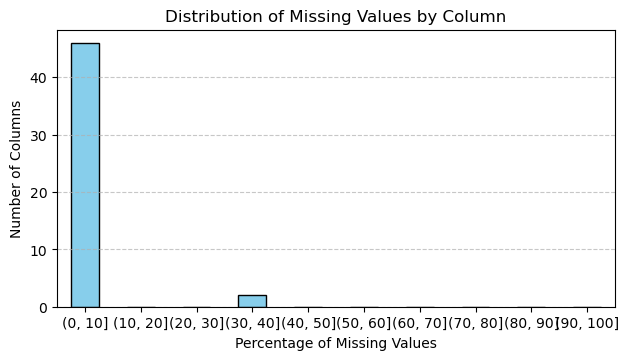

In [29]:
#| echo: false
#| output: asis
#| fig-cap: "Missing Values"
#| fig-align: "center"

import pandas as pd
import matplotlib.pyplot as plt

def check_missing_values(df):
    """
    Function to check missing values in a DataFrame and visualize their distribution.

    Parameters:
    df (pd.DataFrame): Input DataFrame.

    Returns:
    None (prints missing value summary and plots distribution)
    """

    # Check for missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Print summary of missing values
    # print("Missing values in each column:\n", missing_values[missing_values > 0])
    
    # Identify columns with more than 10% missing values
    columns_above_10_percent = missing_percentage[missing_percentage > 10].index.tolist()
    print("\nColumns with more than 10% missing values:", columns_above_10_percent)
    
    # Create bins for percentage of missing values
    bins = [i for i in range(0, 101, 10)]
    missing_percentage_binned = pd.cut(missing_percentage, bins=bins)
    
    # Count number of columns in each bin
    missing_percentage_counts = missing_percentage_binned.value_counts().sort_index()
    
    # Plot distribution of missing values
    plt.figure(figsize=(7.2, 3.6))
    missing_percentage_counts.plot(kind='bar', color="skyblue", edgecolor="black")
    plt.title('Distribution of Missing Values by Column')
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Number of Columns')
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Example Usage:
check_missing_values(raw_data)

#### Reality Check
The reality check was conducted throughout the data cleaning and logic checking processes to ensure that the dataset remained clinically meaningful and free of inconsistencies. While a small number of contradictory data points were identified (e.g., inconsistent symptom reports across related variables), the proportion of such cases was minimal. For example, in some cases, a patient was recorded as having a scalp hematoma (Hema = 1), but the corresponding location (HemaLoc) and size (HemaSize) were marked as ‘Not Applicable’ (92), creating an internal contradiction. Such cases were removed to maintain logical consistency. Therefore, these conflicting records were removed rather than imputed or adjusted. 

By verifying logical consistency and aligning the data preprocessing steps with clinical knowledge, we ensured that the dataset accurately represented real-world patient cases while maintaining the integrity of subsequent analyses.

<div style="page-break-after: always;"></div>

## 4. Exploratory Data Analysis (EDA)

The exploratory data analysis (EDA) phase aims to uncover meaningful patterns and relationships within the dataset. In this chatper, we provided insights into key clinical variables, ensuring that the data is correctly formatted, logically consistent, and capable of supporting further statistical analyses. The following subsections outline the major findings from the EDA process.

### 4.1 Age Distribution and Injury Mechanism

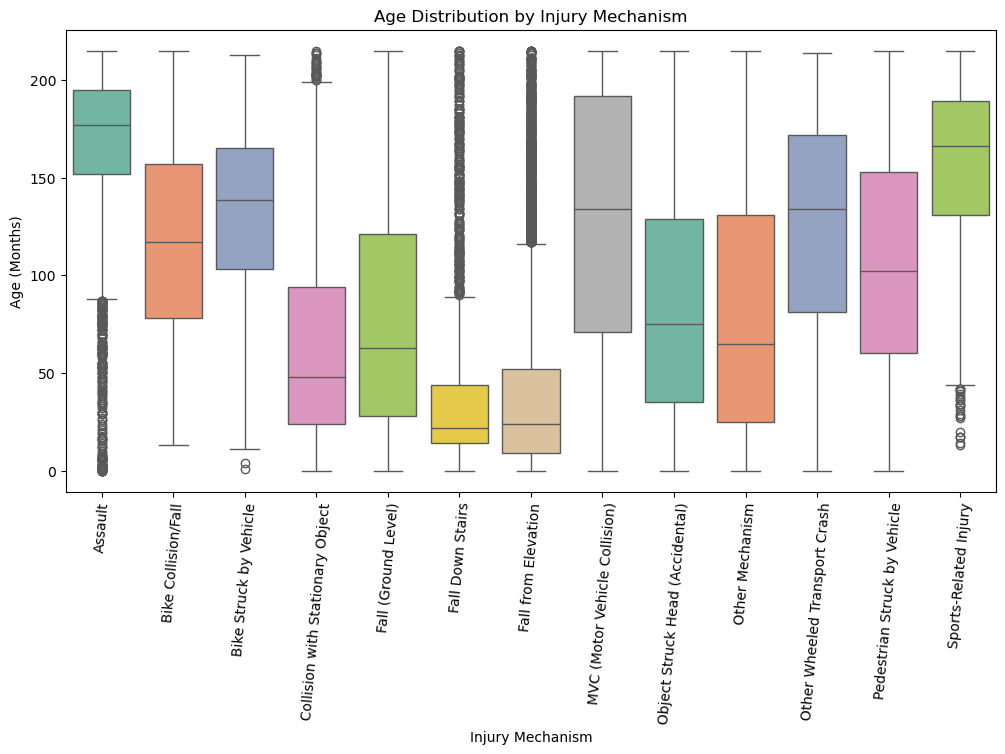

In [4]:
#| echo: false
#| output: asis
#| fig-cap: "Age Distribution by Injury Mechanism"
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure InjuryMech is stored as string
cleaned_data['InjuryMech'] = cleaned_data['InjuryMech'].astype(str)

# Define mapping for Injury Mechanism codes
injury_labels = {
    "1.0": "MVC (Motor Vehicle Collision)", "2.0": "Pedestrian Struck by Vehicle",
    "3.0": "Bike Struck by Vehicle", "4.0": "Bike Collision/Fall",
    "5.0": "Other Wheeled Transport Crash", "6.0": "Fall (Ground Level)",
    "7.0": "Collision with Stationary Object", "8.0": "Fall from Elevation",
    "9.0": "Fall Down Stairs", "10.0": "Sports-Related Injury",
    "11.0": "Assault", "12.0": "Object Struck Head (Accidental)",
    "90.0": "Other Mechanism"
}

# Map InjuryMech to meaningful labels, handling missing values
cleaned_data['InjuryMech_Label'] = cleaned_data['InjuryMech'].map(injury_labels).fillna("Unknown")

# Ensure categorical type
cleaned_data['InjuryMech_Label'] = pd.Categorical(cleaned_data['InjuryMech_Label'])

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='InjuryMech_Label', y='AgeInMonth', data=cleaned_data, palette='Set2')

# Improve x-axis readability
plt.xticks(rotation=85)
plt.title('Age Distribution by Injury Mechanism')
plt.xlabel('Injury Mechanism')
plt.ylabel('Age (Months)')
plt.show()

The above box plot presents the distribution of age (measured in months) across various injury mechanisms. It visually represents key statistical summaries, including the median age (central line), interquartile range (IQR, box), and the overall spread of age values (whiskers) for each injury type. Additionally, outliers (dots) indicate extreme values that deviate from the expected range. The key observations derived from this visualization are outlined below.

Key Observations & Comparisons

1. Youngest vs. Oldest Medians
	- Youngest: Categories like Fall Down Stairs and Collision with Stationary Object tend to cluster around toddler/preschool ages (often under 3–4 years).
	- Oldest: In contrast, Assult, MVC (Motor Vehicle Collision), and Sports-Related Injury skew toward older children and adolescents, often around 10–13 years.
2. Activity-Related Patterns
	- Younger Children: More prone to home or environment-based injuries (e.g., falls from stairs or collisions with stationary(household) objects).
	- Older Children and Adolescents: Involved in higher-risk activities like sports, biking, or riding in/around motor vehicles, aligning with the higher median ages in MVC and Sports-Related Injury.
3. Certain injury types, such as MVC, are observed across a wide range of ages, indicating that these incidents can occur regardless of age group. As a result, precautionary measures should be emphasized for all age groups to mitigate such risks.

Overall, these comparisons highlight how certain injury mechanisms are heavily linked to children’s developmental stage and everyday exposures—whether that’s a toddler exploring stairs or an adolescent playing sports or traveling in a vehicle.

This box plot provides insights into how injury risk varies by age across different mechanisms, which can inform targeted prevention strategies.

### 4.2 Proportion of TBI confirmed by CT based on GCS score

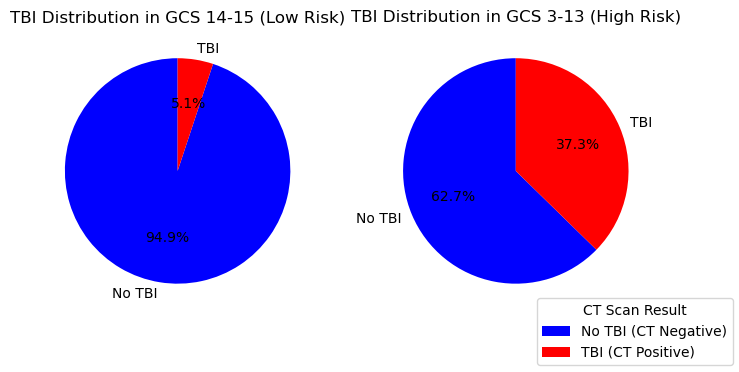

In [18]:
#| echo: false
#| output: asis
#| fig-cap: "Proportion of TBI confirmed by CT based on GCS score"
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

# Define color mapping (Red for High Risk, Blue for Low Risk)
colors = ['blue', 'red']  # Blue (Low Risk), Red (High Risk)

# Correct GCS grouping: High Risk (3-13), Low Risk (14-15)
cleaned_data['GCS_Group'] = cleaned_data['GCSTotal'].apply(lambda x: '3-13 (High Risk)' if x < 14 else '14-15 (Low Risk)')

# Count occurrences for each PosCT category within each GCS group
posct_counts = cleaned_data.groupby(['GCS_Group', 'PosCT']).size().unstack(fill_value=0)  # Fill missing PosCT values with 0

# Ensure both categories (0, 1) exist for all GCS Groups
posct_counts = posct_counts.reindex(columns=[0, 1], fill_value=0)  # Ensure PosCT = 0 and 1 are always present

# Define labels for legend
labels = ['No TBI (CT Negative)', 'TBI (CT Positive)']

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot pie chart for Low Risk (GCS 14-15)
axes[0].pie(posct_counts.loc['14-15 (Low Risk)'], labels=posct_counts.columns.map({0: 'No TBI', 1: 'TBI'}), 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title("TBI Distribution in GCS 14-15 (Low Risk)")

# Plot pie chart for High Risk (GCS 3-13)
axes[1].pie(posct_counts.loc['3-13 (High Risk)'], labels=posct_counts.columns.map({0: 'No TBI', 1: 'TBI'}), 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title("TBI Distribution in GCS 3-13 (High Risk)")

# Add a single legend to the figure
fig.legend(labels, loc="lower right", title="CT Scan Result")

plt.show()

The purpose of this analysis was to examine the relationship between GCS scores and the likelihood of detecting TBI (Traumatic Brain Injury) on CT scans. As shown in the figure, there is a clear trend: the lower the GCS score, the higher the probability of detecting TBI.

However, as previously noted in the reference study, the original research primarily focused on low-risk patients (GCS 14-15). This study was conducted to identify a subset of patients for whom CT scans could be safely avoided, given that the posterior probability of detecting TBI in this group is approximately 5%. This small yet significant probability explains why CT scans are often performed even in cases classified as low risk. Thus, the study aims to refine decision-making criteria to reduce unnecessary CT scans while ensuring patient safety, making it a highly meaningful and impactful area of research.

### 4.3 Frequency of Symptoms in the Datasets when TBI occurs

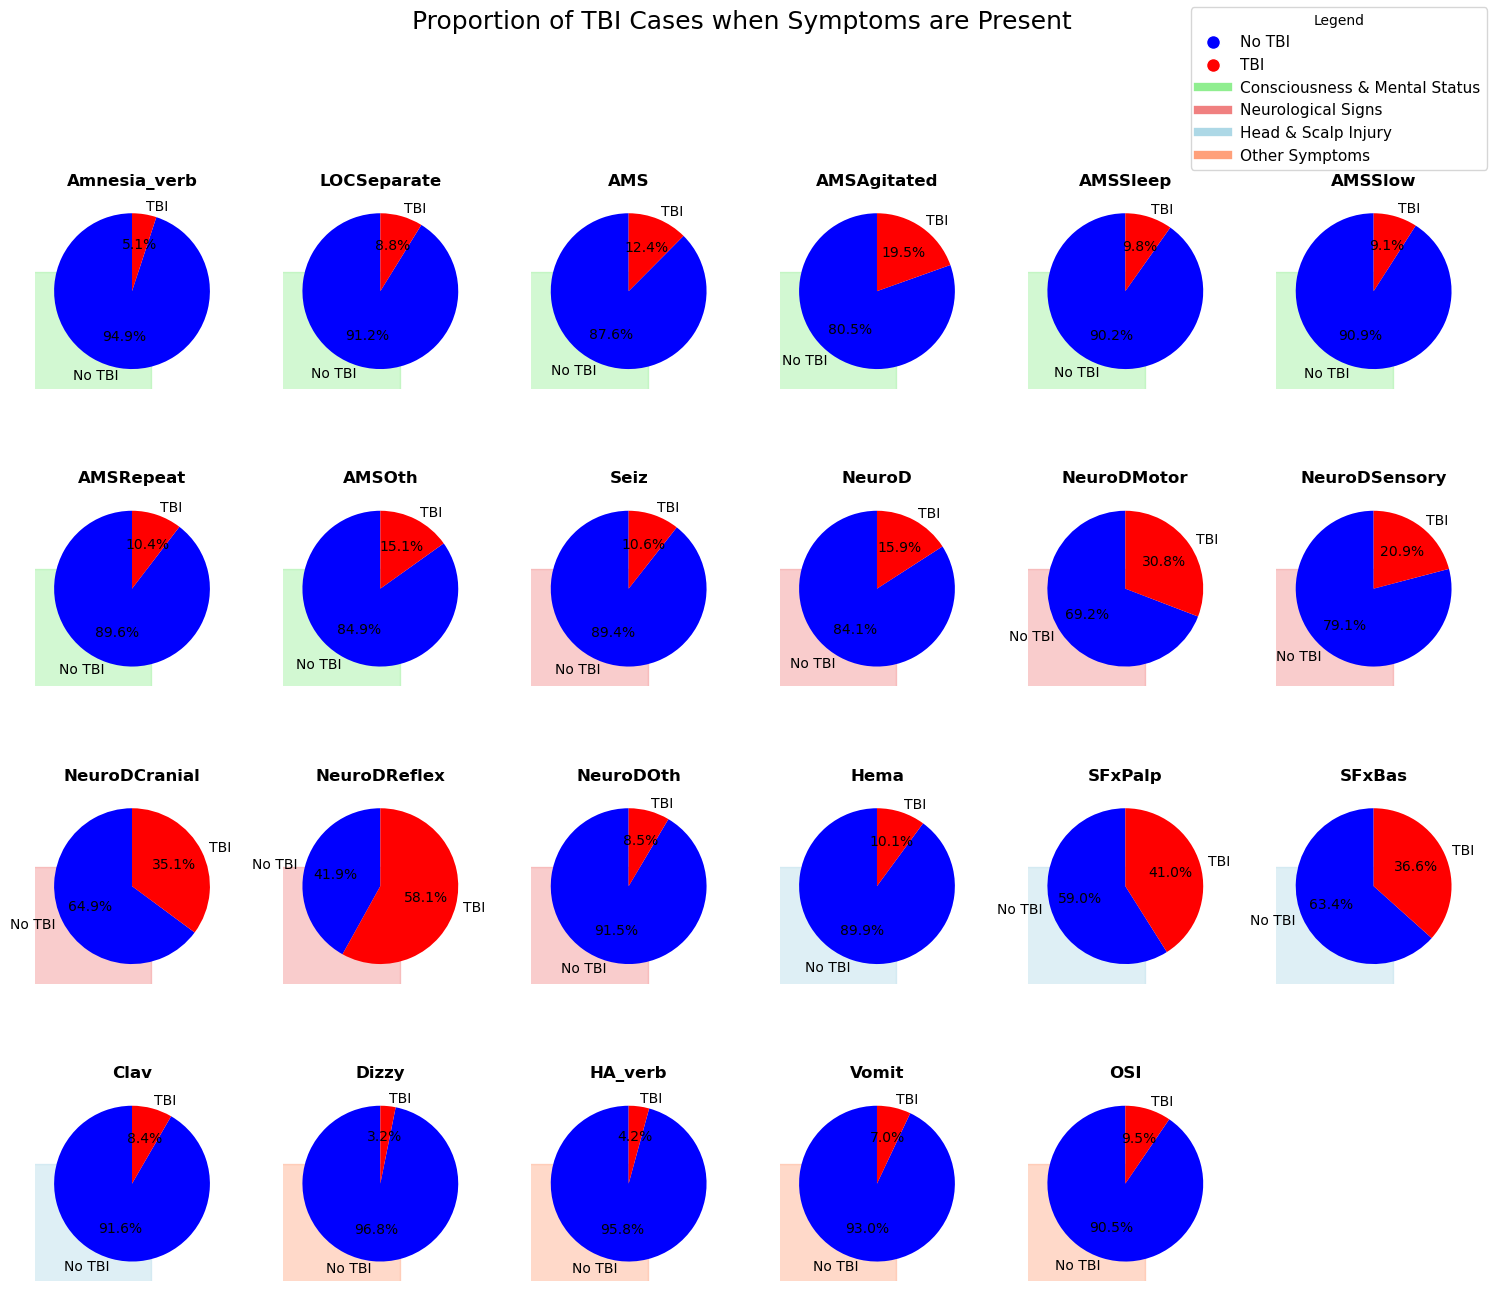

In [6]:
#| echo: false
#| output: asis
#| fig-cap: "Proportion of TBI Cases when Symptoms are Present"

import pandas as pd

import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches

# Define symptom groups with clear categorization
symptom_groups = {
    "Consciousness & Mental Status": [
        "Amnesia_verb", "LOCSeparate", "AMS", "AMSAgitated", 
        "AMSSleep", "AMSSlow", "AMSRepeat", "AMSOth"
    ],
    "Neurological Signs": [
        "Seiz", "NeuroD", "NeuroDMotor", "NeuroDSensory", 
        "NeuroDCranial", "NeuroDReflex", "NeuroDOth"
    ],
    "Head & Scalp Injury": [
        "Hema", "SFxPalp", "SFxBas", "Clav"
    ],
    "Other Symptoms": [
        "Dizzy", "HA_verb", "Vomit", "OSI"
    ]
}

# Define colors for TBI presence (Red: TBI Positive, Blue: TBI Negative)
colors = ['blue', 'red']

# Define background colors for each symptom group
group_backgrounds = {
    "Consciousness & Mental Status": "lightgreen",
    "Neurological Signs": "lightcoral",
    "Head & Scalp Injury": "lightblue",
    "Other Symptoms": "lightsalmon"
}

# Flatten all symptoms while keeping track of group breaks
group_names = list(symptom_groups.keys())
all_symptoms = []
group_labels = []  # Track group for each symptom

for group, symptoms in symptom_groups.items():
    all_symptoms.extend(symptoms)
    group_labels.extend([group] * len(symptoms))

# Determine subplot grid size
num_symptoms = len(all_symptoms)
cols = 6  # Max 6 per row
rows = math.ceil(num_symptoms / cols) + len(group_names)  # Extra rows for group labels

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

# Generate pie charts with small backgrounds
ax_idx = 0  # Track subplot index
group_idx = 0  # Track group index

for i, symptom in enumerate(all_symptoms):
    ax = axes[ax_idx]

    # Get the corresponding group color
    group_name = group_labels[i]
    group_color = group_backgrounds[group_name]

    # Draw a small background rectangle around each pie chart
    rect = patches.Rectangle(
        (-0.6, -0.6),  # Position (relative to axes)
        1.2, 1.2,  # Width & height
        transform=ax.transAxes,  # Make it relative to axis
        color=group_color, alpha=0.4, zorder=-1
    )
    ax.add_patch(rect)

    # Calculate proportions of TBI cases when the symptom is present (value = 1)
    tbi_counts = cleaned_data[cleaned_data[symptom] == 1]['PosCT'].value_counts(normalize=True).reindex([0, 1], fill_value=0)

    # Labels
    labels = ['No TBI', 'TBI']
    sizes = [tbi_counts[0], tbi_counts[1]]

    # Plot pie chart
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(symptom, fontsize=12, fontweight="bold")

    ax_idx += 1  # Move to the next subplot

# Remove unused empty subplots
for j in range(ax_idx, len(axes)):
    fig.delaxes(axes[j])

# Add legend for TBI and symptom group color
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="No TBI"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="TBI"),
    plt.Line2D([0], [0], color='lightgreen', lw=6, label="Consciousness & Mental Status"),
    plt.Line2D([0], [0], color='lightcoral', lw=6, label="Neurological Signs"),
    plt.Line2D([0], [0], color='lightblue', lw=6, label="Head & Scalp Injury"),
    plt.Line2D([0], [0], color='lightsalmon', lw=6, label="Other Symptoms")
]
fig.legend(handles=handles, loc="upper right", title="Legend", fontsize=11)

# Layout adjustments
plt.tight_layout()
plt.suptitle("Proportion of TBI Cases when Symptoms are Present", fontsize=18, y=1.05)
plt.show()

**Proportion of TBI Cases when Symptoms are Present**

This analysis aims to evaluate the likelihood of traumatic brain injury (TBI) detection based on symptoms that can be assessed before conducting a CT scan. Since CT imaging is costly, time-consuming, and carries radiation exposure risks, identifying symptoms that strongly correlate with TBI can help refine clinical decision-making. To achieve this, we examined how the presence or absence of certain symptoms affects the proportion of TBI cases.

Each pie chart in the figure represents the proportion of patients with a given symptom who were diagnosed with TBI (red) versus those who were not (blue). The symptoms are categorized into four major groups: Consciousness & Mental Status, Neurological Signs, Head & Scalp Injury, and Other Symptoms. Below are the key findings from the analysis.

1. Consciousness & Mental Status
	- Cases where altered mental status (AMS) symptoms are present show a relatively high probability of TBI detection. Overall, 12.4% of patients with AMS are found to have TBI. Among the subcategories, AMSAgitated and AMSOth exhibit particularly high TBI detection rates.
	- Loss of consciousness (LOCSeparate) also presents a notable association with TBI, indicating that a history of LOC should not be overlooked in clinical evaluations.
	- Amnesia, while showing a comparatively lower probability of TBI detection (5.1%), still represents a non-negligible factor that warrants consideration in risk assessments.

2. Neurological Signs
	- Seizures (Seiz) and general neurological deficits (NeuroD) show significantly high TBI detection rates, reinforcing their importance in clinical assessments. Seizures are associated with a 10.6% TBI detection rate, while NeuroD cases show an even higher probability at 15.9%.
	- Among the specific neurological deficits, certain conditions exhibit exceptionally high correlations with TBI. NeuroDReflex has the highest TBI detection rate at 58.1%, followed by NeuroDMotor (30.8%) and NeuroDCranial (35.1%), indicating that these neurological abnormalities are strong indicators of severe brain injury.

3. Head & Scalp Injury
	- Palpable skull fractures (SFxPalp) and basilar skull fractures (SFxBas) are among the strongest predictors of TBI, with 41.0% and 36.6% positive detection rates, respectively. This highlights the critical role of physical examination in identifying high-risk cases.
	- Scalp hematoma (Hema, 10.1%) is another notable factor but appears to be a weaker predictor compared to fractures.
	- Clavicular or facial trauma (Clav, 8.4%) shows a moderate association with TBI. While the detection rate is lower compared to other symptoms, it remains a non-negligible factor that should not be overlooked in head trauma evaluations.

4. Other Symptoms
	- Other substantial injuries (OSI, 9.5%) show a higher association with TBI compared to symptoms like dizziness, headache, and vomiting. This suggests that significant non-head trauma may still indicate an increased risk of brain injury.
	- Dizziness (3.2%), headache (4.2%), and vomiting (7.0%) exhibit lower TBI detection rates relative to other symptoms. However, they remain clinically relevant, as they may contribute to a more comprehensive risk assessment when evaluated alongside other factors.

### 4.4 CT Utilization and TBI Detection Among GCS 14-15 Patients


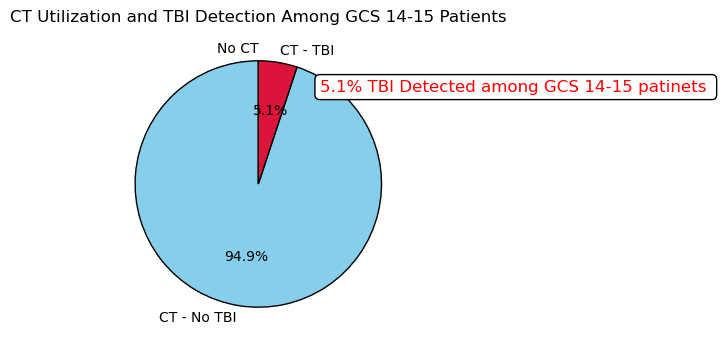

In [20]:
#| echo: false
#| output: asis
#| fig-cap: "Proportion of TBI Cases when Symptoms are Present"

import pandas as pd
import matplotlib.pyplot as plt

# Filter for low-risk patients (GCS 14-15)
low_risk_data = cleaned_data[cleaned_data['GCSGroup'] == 2]

# Proportion of low-risk patients who had a CT scan
ct_rate = (low_risk_data['CTDone'] == 1).mean()  # 34.23%

# Among those who had a CT scan, proportion where TBI was NOT found
ct_scanned_data = low_risk_data[low_risk_data['CTDone'] == 1]
no_tbi_rate = (ct_scanned_data['PosCT'] == 0).mean()  # 94.91%

# Compute final proportions
no_ct = (1 - ct_rate) * 100  # Patients who did not undergo CT
no_tbi_ct = (ct_rate * no_tbi_rate) * 100  # CT taken, but no TBI found
tbi_ct = 100 - (no_ct + no_tbi_ct)  # Remaining % is TBI found

# Data for pie chart
sizes = [no_ct, no_tbi_ct, tbi_ct]
labels = ["No CT", "CT - No TBI", "CT - TBI"]
colors = ["#4682B4", "#87CEEB", "#DC143C"]  # Dark blue, light blue, and red

# Plot pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct=lambda p: f"{p:.1f}%" if p > 2 else "", 
    colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}
)

# Manually add annotation for the small slice (TBI detected)
plt.annotate(
    f"{tbi_ct:.1f}% TBI Detected among GCS 14-15 patinets ", 
    xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12, color='red',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)

plt.title("CT Utilization and TBI Detection Among GCS 14-15 Patients")
plt.show()

This chart illustrates the proportion of low-risk patients (GCS Score 14-15) who underwent CT scans and the rate at which TBI was detected among them. Despite being classified as low-risk, approximately one-third (34.2%) of these patients received CT scans. However, only 1.7% of those who underwent CT were actually diagnosed with TBI.

While a 1.7% detection rate is not negligible, it raises concerns regarding the efficiency of CT utilization in this patient group. The fact that a significant proportion (32.5%) of scanned patients showed no evidence of TBI suggests that a large number of CT scans may be unnecessary. This has implications for radiation exposure, healthcare costs, and resource allocation.

Thus, the study’s objective—to refine criteria for reducing unnecessary CT scans while ensuring patient safety—is well justified. This visualization supports the need for improved decision-making models to identify patients who truly require CT imaging, thereby minimizing unnecessary scans and associated risks.

The key difference between the previous analysis (Section 4.2) and the current one lies in their objectives. Section 4.2 aimed to evaluate whether the GCS score is a meaningful predictor of TBI, analyzing the relationship between GCS scores and the likelihood of detecting TBI.

In contrast, this analysis focuses on assessing the potential to reduce unnecessary CT scans. While GCS 14-15 patients are categorized as low-risk, a substantial proportion still undergoes CT imaging. By examining the proportion of scans that do not result in TBI detection, we aim to identify opportunities for optimizing CT utilization, minimizing radiation exposure, and reducing healthcare costs without compromising patient safety.

## 5. Data Modeling

**Model Implementation**

To determine whether a CT scan should be recommended for patients with minor head trauma, we implemented two classification models to predict the likelihood of traumatic brain injury (TBI) based on pre-CT clinical and demographic features.

**Logistic Regression Model for TBI Prediction**
A logistic regression model was chosen for its interpretability and probability-based classification. The model was trained using key predictor variables, including GCS scores, presence of neurological deficits, loss of consciousness (LOC), vomiting, severe headache, and injury mechanism. 

- Feature Selection: Variables were chosen based on clinical guidelines from Kuppermann et al. (2009).  
- Regularization: L2 regularization was applied to prevent overfitting.  
- Performance Metrics: Model evaluation was conducted using accuracy, AUC-ROC, precision, recall, and F1-score.  

The dataset was split into training and test sets (80/20 split, stratified by class). The results highlight the model’s ability to classify TBI cases while identifying areas for potential improvement.

**Random Forest Model for TBI Prediction**
A Random Forest model was implemented as a more complex alternative to capture non-linear relationships and interactions between features.

- Bootstrap Aggregation (Bagging): The model was trained using an ensemble of decision trees.  
- Feature Importance Analysis: The relative contribution of each feature was assessed to determine its impact on TBI prediction.  
- Hyperparameter Tuning: The number of trees (`n_estimators`) and maximum depth (`max_depth`) were optimized using cross-validation.  
- Class Imbalance Handling: Class weighting (`class_weight="balanced"`) was applied to mitigate the effect of imbalanced data.  

Both models were evaluated on the same dataset split (80% training, 20% testing). Detailed performance metrics and model interpretations are provided in the following sections. If you want to check the implementation details, please refer to `/code/lab1.ipynb`.

##### Logistic Regression Model for Traumatic Brain Injury (TBI) Prediction

This study utilizes a logistic regression model to predict the presence of traumatic brain injury (TBI) using a selected set of clinical features. The dataset includes variables related to consciousness, neurological signs, head injuries, symptoms, and injury mechanisms, with Glasgow Coma Scale (GCS) scores as an additional predictor.

To ensure data quality, abnormal target values (e.g., 92) were removed, and the dataset was split into training and test sets (80/20 split, stratified by class). A logistic regression model with L2 regularization was trained and evaluated on key performance metrics, including accuracy, AUC-ROC, precision, recall, and F1-score. The results provide insights into the model’s ability to classify TBI cases while highlighting areas for potential improvement. The following values are the results of applying the model. If you want to check the code, please refer to /code/lab1.ipynb.

-*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*-

In [14]:
#| echo: false
#| output: asis

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Select features to use
selected_features = [
    "Amnesia_verb", "LOCSeparate", "AMS",  # Consciousness & Mental Status
    "Seiz", "NeuroD", "SFxPalp", "SFxBas",  # Neurological Signs
    "Hema", "Clav", "Dizzy", "HA_verb",  # Head & Scalp Injury
    "Vomit", "ActNorm", "OSI",  # Other Symptoms
    "InjuryMech", "High_impact_InjSev",  # Injury Mechanism
    "GCSTotal"  # GCS Score
]

# Remove abnormal target values (e.g., 92)
cleaned_data = cleaned_data[cleaned_data["PosCT"].isin([0, 1])]

# Define X (features) and y (target variable)
X = cleaned_data[selected_features]  # Selected features
y = cleaned_data["PosCT"].astype(int)  # Target: 0 (No TBI), 1 (Yes TBI)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
logreg = LogisticRegression(solver='liblinear', C=1.0)  # L2 regularization
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Model evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Performance:
Accuracy: 0.939
AUC-ROC: 0.812
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2726
           1       0.73      0.16      0.27       197

    accuracy                           0.94      2923
   macro avg       0.83      0.58      0.62      2923
weighted avg       0.93      0.94      0.92      2923

Confusion Matrix:
[[2714   12]
 [ 165   32]]


-*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*-

**Logistic Regression Model Performance Analysis**

The logistic regression model achieved a high accuracy (93.9%) and a moderate AUC-ROC score (0.812). However, its performance is highly skewed toward identifying non-TBI cases, leading to a critical failure in detecting actual TBI cases.

- **Key Findings**
    - **High Specificity** (99.6%): The model correctly identifies most non-TBI cases (2714 out of 2726).
    - **Extremely Low Sensitivity** (16%): The model fails to detect the majority of TBI cases, misclassifying 165 out of 197 actual cases as non-TBI.
    - **Precision for TBI cases** (73%): While relatively high, this value is misleading due to the model’s extremely low recall.
    - **AUC-ROC** (0.812) suggests moderate discriminatory power, but given the severe class imbalance and low recall, the model’s practical effectiveness in TBI detection is limited.

- **Areas for Improvement**
    - **Address Class Imbalance:** Apply class weighting (class_weight='balanced') or oversampling (SMOTE) to enhance the model’s ability to detect TBI cases.
    - **Optimize Decision Threshold:** Lowering the classification threshold could help capture more TBI cases, though it may increase false positives.
    - **Feature Engineering & Model Selection:** Incorporating advanced models (e.g., Random Forest, XGBoost) may help capture non-linear relationships and improve recall. Moreover, exploring domain-specific features related to TBI might enhance model interpretability.

##### Random Forest Model for Traumatic Brain Injury (TBI) Prediction

This study employs a Random Forest model to predict the presence of traumatic brain injury (TBI) using a selected set of clinical features. The dataset includes variables related to consciousness, neurological signs, head injuries, symptoms, and injury mechanisms, incorporating the Glasgow Coma Scale (GCS) scores as additional predictors.

To enhance model performance and account for class imbalance, the Random Forest model was trained with class weighting and limited tree depth to prevent overfitting. The dataset was split into training and test sets (80/20 split, stratified by class). Key performance metrics, including accuracy, AUC-ROC, precision, recall, and F1-score, were evaluated to assess the model’s predictive ability.

Additionally, feature importance analysis was conducted to identify the most influential variables contributing to TBI classification. The following values represent the model’s performance results. If you want to check the code, please refer to `/code/lab1.ipynb`.

The following values are the results of applying the model. If you want to check the code, please refer to /code/lab1.ipynb.

-*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*-

In [ ]:
#| echo: false
#| output: asis

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Limit depth to prevent overfitting
    random_state=42,
    class_weight="balanced"  # Adjust for class imbalance
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nTop Important Features:")
print(feature_importance.head(10))

Random Forest Performance:
Accuracy: 0.886
AUC-ROC: 0.786
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2726
           1       0.28      0.42      0.33       197

    accuracy                           0.89      2923
   macro avg       0.62      0.67      0.64      2923
weighted avg       0.91      0.89      0.90      2923


Top Important Features:
GCSTotal              0.215397
InjuryMech            0.101300
SFxPalp               0.099781
AMS                   0.088996
High_impact_InjSev    0.076605
HA_verb               0.065585
Hema                  0.060244
Amnesia_verb          0.050107
SFxBas                0.049113
LOCSeparate           0.046090
dtype: float64


-*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*--*=-=*-


**Random Forest Model Performance Analysis**

The Random Forest model achieved a high accuracy (88.6%) and a moderate AUC-ROC score (0.786). Compared to logistic regression, it improves recall for TBI cases (16% → 42%), but at the cost of lower precision, leading to more false positives.

**Key Findings**
- Higher Recall for TBI Cases (42%)
  - The model detects more actual TBI cases than logistic regression (16% → 42%), reducing false negatives from 165 to 114.  
  - This is crucial in clinical settings where missing TBI cases could lead to severe consequences.  
- Lower Precision for TBI Cases (28%)  
  - Many predicted TBI cases are actually false positives, leading to unnecessary CT scans and potential overdiagnosis.  
- Moderate AUC-ROC (0.786)
  - This score suggests the model has a decent ability to distinguish between TBI and non-TBI cases.  
  - However, it is slightly lower than logistic regression (0.812), implying that the trade-off in recall gain comes at some cost to overall classification power.  

- **High Accuracy (88.6%) but Misleading**  
  - While 88.6% accuracy seems strong, it is lower than logistic regression (93.9%) because the model is making more positive predictions.  
  - Given the class imbalance, accuracy is not the best metric to evaluate performance, and recall is more critical for clinical application.  

- **Top Important Features:**
  - GCSTotal (21.5%): The most influential feature, aligning with clinical knowledge that the Glasgow Coma Scale is a key TBI predictor.  
  - InjuryMech (10.1%) & High_impact_InjSev (7.6%): Indicators of serious trauma, reinforcing the importance of injury mechanism in TBI risk assessment.  
  - SFxPalp (9.9%) & AMS (8.9%): Significant predictors based on neurological status.  

**Areas for Improvement**
- Fine-Tune Model Hyperparameters 
  - Increasing `n_estimators` and adjusting `max_depth` may improve recall without excessive false positives.  

- Optimize Classification Threshold
  - Lowering the decision threshold from 0.5 could capture more TBI cases, but further calibration is needed to control false positives.  

**Key Takeaway**
The Random Forest model improves recall significantly compared to logistic regression, which is beneficial for detecting TBI cases. However, this improvement comes at the cost of lower precision and more false positives. Future work should focus on balancing recall and precision through hyperparameter tuning, threshold optimization, and alternative models to ensure both sensitivity to true TBI cases and minimization of unnecessary CT scans.

## 6. Discussion

This analysis highlights the importance of rigorous data preprocessing and model selection in clinical decision-making for traumatic brain injury (TBI) prediction. The PECARN TBI dataset required careful handling of missing values, standardization, and feature selection to ensure data integrity. 

Both logistic regression and random forest models were evaluated to assess their predictive performance. Logistic regression provided a highly interpretable model, which aligns with clinical guidelines but suffered from low recall, making it less effective in detecting TBI cases. On the other hand, the random forest model demonstrated improved recall (42% vs. 16%), capturing more true TBI cases at the cost of lower precision. Feature importance analysis further revealed that Glasgow Coma Scale (GCS), injury mechanism, and neurological signs were among the strongest predictors.

While the random forest model showed better sensitivity, its higher false positive rate suggests the need for further optimization, such as threshold tuning, class balancing, or ensemble approaches like XGBoost or LightGBM. Additionally, incorporating external validation datasets could enhance the model’s generalizability in real-world clinical settings.

## 7. Conclusion

This study provides a comprehensive workflow for TBI risk assessment using various models, from data cleaning to predictive modeling. Our findings reinforce the significance of clinical domain knowledge in feature selection and model evaluation. While the logistic regression model offers a simple and interpretable framework, the random forest model provides better recall, making it more suitable for high-risk patient identification.

Future work should focus on refining model performance by optimizing classification thresholds, incorporating cost-sensitive learning, and exploring ensemble-based approaches to balance recall and precision. Additionally, further external validation with independent datasets would help assess model robustness and ensure its applicability in real-world clinical settings.

These findings contribute to the ongoing effort to improve CT scan utilization by providing a data-driven approach to identifying high-risk patients while minimizing unnecessary scans.

## 8. Academic Honesty Statement

I hereby pledge that all work presented in this report is my own. All external sources, including the PECARN study and Kuppermann et al. (2009), have been properly cited. I affirm that the code and analyses are original and fully reproducible.

## 9. Bibliography

1. Kuppermann, N., Holmes, J. F., Dayan, P. S., et al. (2009). Identification of children at very low risk of clinically-important brain injuries after head trauma: a prospective cohort study. *The Lancet*, 374, 1160–1170.
2. TBI PUD Documentation. [Provided in lab1/data folder]